# CHAPTER 2. 지도 학습
지도학습: 샘플데이터가 입력과 출력 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용한다.

-> 훈련 세트로 부터 머신러닝 모델을 만든다.

목표: 이전에 본적없는 새로운 데이터에 대해 정확한 출력을 예측

단점: 지도 학습은 훈련 데이터를 만드는데 사람의 노력이 필요

장점: 자동화 하면 힘들고 어려운 작업의 속도를 높일 수 있다

## 2.1 분류와 희귀

# 분류 
분류는 미리 정의된 가능성 있는 클래스 레이블(Class label)중 하나를 예측하는 것 ( 예: 1장의 붓꽃 어플리케이션)

분류는 딱 두개의 클래스로 분류하는 이진 분류(binary classificatoin)와 셋 이상의 클래스로 분류하는 다중 분류(Multiclassclassification)으로 나뉨

이진분류: '예/아니오'로 나뉠 수 있는것이라고 생각하면 됨 (예시- 스팸메일 인가요? : 예/아니오)

다중분류: 여러 클래스 중 하나로 분류 (예: 붓꽃 어플리케이션, 웹사이트 글로부터 어느 언어의 웹사이트인지 예측) 

-> 연속적이지 않음 -> 사이트 분류할때 한 언어가 아니면 다른언어임, 영어랑 프랑스어 사이에 다른 언어는 없음

## 회귀

연속적인 숫자( 프로그래밍 용어로 부동소수점수, 수학 용어로 실수)를 예측

예시로 어떤 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측 -> 예측된 값은 어떤 양으로서, 일정 범위 안의 어떤 숫자도 될수 있다.

출력값에 연속성이 있음 -> 연소득 예측에서 40,000,000원 또는 40,000,001원을 벌 수 있음. -> 다르지만 큰 차이 없다.

## 2.2 일반화, 과대적합, 과소적합

일반화 (generalization)

과대적합 (overfiting)

과소적합 (underfiting)

모델을 복잡하게 할 수록 훈련데이터에 대해서 더 정확히 예측

하지만 너무 복잡해지면 훈련 세트의 각 데이터 포인트에 너무 민감해짐 -> 새로운 데이터에 일반화 잘 못함

## 2.3 지도 학습 알고리즘

다양한거 알아보고 장단점도 알아보자

In [63]:
from IPython.display import display
import mglearn
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

## 2.3.1 예제에 사용할 데이터셋

### 분류(인위적)
어떤 데이터셋은 작고 인위적이고 알고리즘의 특징을 부각하기 위해 만든것
실제  샘플로 만든 데이터도 있다.

데이터 셋을 만듬 -> forge 데이터셋은 인위적으로 만든 이진 분류 세트.

In [64]:
X,y = mglearn.datasets.make_forge()

산점도를 그리자

X.shape:(26, 2)


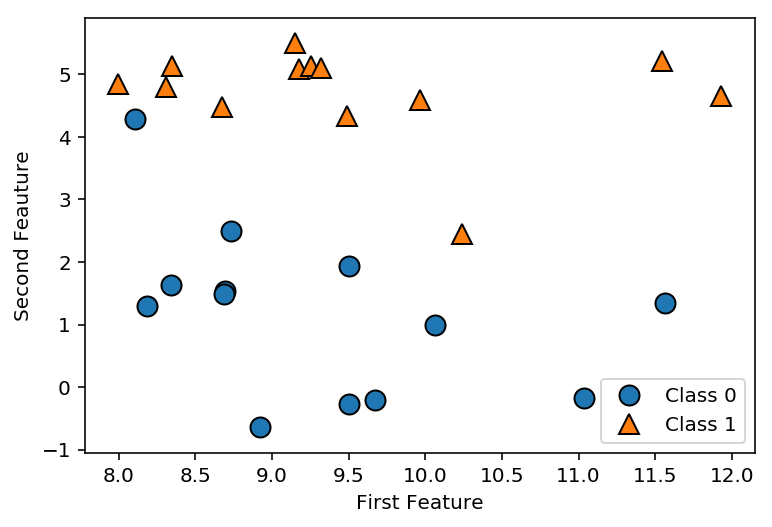

In [65]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feauture")
print("X.shape:{}".format(X.shape))

데이터포인트 26개, 특성 2개

### 회귀(인위적)
인위적으로 만든 wave데이터셋 사용

wave 데이터세트 : 입력 특성 하나와 모델링할 타깃 변수( 또는 응답) 을 가짐

Text(0,0.5,'Target')

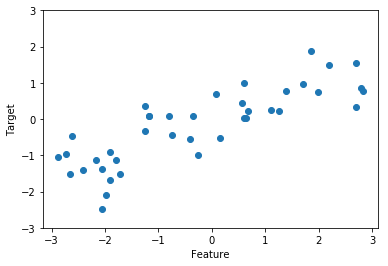

In [5]:
X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

저차원을 예시로 들자 (저차원 데이터셋에서 얻은 직관이 고차원 데이터셋에서 그대로 유지 되지 않을 수 있음)

scikit-learn에 들어있는 실제 데이터셋 두개도 사용해보자
### 실제 분류 데이터 : 위스콘신 유방암 데이터
유방암 종양의 임상 데이터를 기록 -> 각 종양은 양성(암X)과 악성(암) 종양으로 레이블 됨-> 조직데이터로 양성인지 악성인지 예측가능

scikit-learn에 있는 load_breast_cancer 함수로 불러옴

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n{}".format(cancer.keys()))

cancer.keys():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


scikit-learn에 포함된 데이터셋은 실제 데이터와 데이터 셋 관련 정보를 담고 있는 Bunch 객체에 저장

-> Bunch 객체는 파이선 딕셔너리와 비슷하지만 점 표기법 사용가능 -> bunch['key]대신 bunch.key 사용 가능


In [7]:
print("유방함 데이터의 형태:{}".format(cancer.data.shape))

유방함 데이터의 형태:(569, 30)


이 데이터셋은 569개의 데이터 포인트, 특성 30개 -> 악성과 양성은 각각 몇개일까?

In [8]:
print("클래스 별 샘플 개수 :\n{}".format({n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스 별 샘플 개수 :
{'malignant': 212, 'benign': 357}


양성(benign): 357개, 음성(malignant):212개

feature_names 속성을 확인하면 각 특성의 의미를 알 수 있음

In [9]:
print("특성의 이름:\n{}".format(cancer.feature_names))

특성의 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


데이터에 관한 더 자세한 정보는 cancer.DESCR에서 확인할 수 있음

### 회귀 분석용 실제 데이터 : 보스턴 주택가격

범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용 -> 1970년대 보스턴 주변 주택 평균 가격 예측

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터 형태:{}".format(boston.data.shape))

데이터 형태:(506, 13)


506개의 데이터포인트와 특성 13개

boston 객체의 DESCR 속성에서 더 자세한 정보 확인 할 수 있음

13개의 입력 특성뿐 아니라 특성끼리 곱하여(상호작용) 의도적으로 확장 -> 특성의 곱도 특성으로 생각함 -> 특성공학(4장에서 나올것)

유도된 데이터셋은 아래 코드로 불러옴

In [11]:
X,y =mglearn.datasets.load_extended_boston()
print("X.shape:{}".format(X.shape))

X.shape:(506, 104)


13개의 원래 특성에 13개씩에서 2개씩 (중복포함) 짝지은 91개 특성 더해 총 104개 됨

## 2.3.2 k-최근법 이웃
k-NN ( k-Nearest Neigbors ) 알고리즘은 가장 간단한 머신러닝 알고리즘 -> 훈련 데이터셋을 그냥 저장하는 것이 모델 만드는게 전부

새로운 포인트에 대해 예측할 땐 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트(최근접 이웃)을 찾음

### k-최근접 이웃 분류
가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측 -> 이 훈련 데이터 포인트의 출력이 예측됨

forge데이터셋을 분류해보자

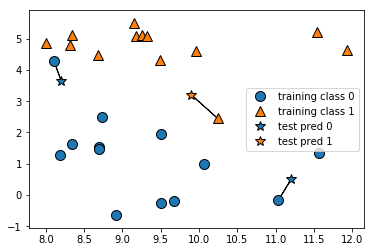

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

데이터 포인트 3개 추가( 별모양 ) -> 가장 가까운 포인트 데이터 연결 -> 1-최근접 이웃 알고리즘의 예측은 가장 가까운 데이터 포인트의 레이블

1개가 아니라 k개 선택 가능 (그래서 k-최근접 이웃 알고리즘이라 부름) -> 둘 이상의 이웃을 선택할때는 레이블을 정하기 위해 투표함 -

-> 데이터 포인트에 클래스1이 몇개 클래스0이 몇개인지 셈 -> 이웃이 더 많은 클래스를 레이블로 지정

k=3

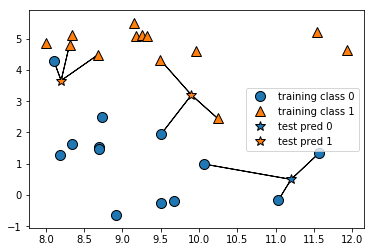

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

클래스가 다수 일때도 적용 가능 -> 클래스가 여러개이면 각 클래스에 속한 이웃이 몇 개인지를 헤아려 가장 많은 클래스를 예측값으로 사용

scikit-learn을 사용해서 k-최근법 이웃 알고리즘 적용하자 -> train세트와 test세트로 나눔

In [14]:
from sklearn.model_selection import train_test_split
X, y=mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

임포트 -> 이웃 수를 3으로 지정

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

train세트 학습 -> KNeighborsClassifier에서는 저장

In [16]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

테스트 데이터에 대해 predict 메서드 호출하여 예측 -> 테스트 세트의 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산

In [17]:
print("테스트 세트 예측:{}".format(clf.predict(X_test)))

테스트 세트 예측:[1 0 1 0 1 0 0]


얼마나 정확할까(일반화 되었을까)? -> score 메서드에 테스트 데이터와 테스트 레이블을 넣어 호출

In [18]:
print("테스트 세트 정확도:{:.2f}".format(clf.score(X_test,y_test)))

테스트 세트 정확도:0.86


### KneighborsClassifier 분석

2차원 데이터셋 -> xy평면에 그려볼 수 있음 -> 데이터 포인트가 속한 클래스에 따라 색을 다르게함 -> 클래스0과 클래스1로 지정한 영역으로 나뉘는 결정 경계 (decision boundary)를 볼 수 있음

이웃이 1, 3, 9 일때 각각 결정 경계를 봐보자

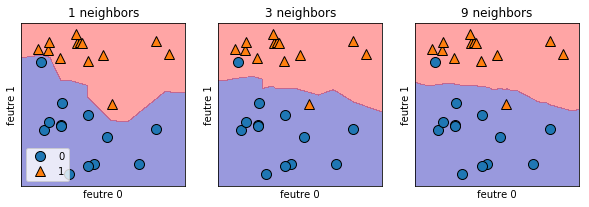

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1,3,9],axes):
    #fit 매서드는 self객체를 반환 -> 객체 생성과 fit 매서드를 한줄에 쓸 수 있음
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True, eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("feutre 0")
    ax.set_ylabel("feutre 1")
axes[0].legend(loc=3)    

이웃 하나 -> 결정 경계가 훈련 데이터에 가까움 -> 이웃의 수를 늘릴수록 경계는 부드러워짐 -> 부드러울수록 더 단순한 모델

이웃 적음 -> 모델의 복잡도 증가 

이웃 많음 -> 모델의 복잡도 감소

극단적인 경우 : 훈련데이터의 수 = 이웃의 수 -> 테스트 포인트에 대한 예측은 모두 훈련세트에서 가장 많은 데이터 포인트를 가진 클래스가 예측값이 됨

### 실제 유방암 데이터를 사용하여 모델의 복잡도와 일반화 사이의 관계를 입증해보자

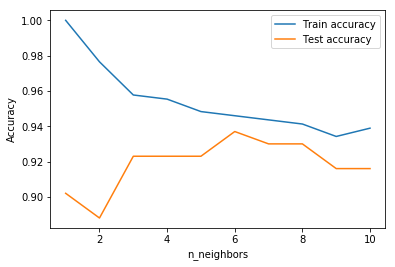

In [20]:
from sklearn.datasets import load_breast_cancer

cancer  =load_breast_cancer()

X_train, X_test, y_train,y_test =train_test_split(cancer.data,cancer.target,stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

#1~10까지 n_neighbors 사용
neighbors_setting =range(1,11)

for n_neighbors in neighbors_setting:
    #모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    
    #훈련세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
#그래프 그리기
plt.plot(neighbors_setting, training_accuracy, label="Train accuracy")
plt.plot(neighbors_setting, test_accuracy, label="Test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()

그림은 n_neighbors 수에 따른 훈련세트와 테스트 세트의 정확도를 표현 -> 매끈하진 않지만, 과대적합과 과소적합을 볼 수 있음

최근접 이웃수가 하나일때 완벽 훈련 데이토 예측 완벽 -> 이웃수가 늘어날 수록 모델 단순 -> 훈련 데이터의 정확도 감소 

테스트 세트의 정확도 : 이웃이 1개일때,모델이 복잡해서 많이 사용했을때보다 낮음 -> 이웃 10개이면 모델이 너무 단순해서 또 낮아짐 -> 중간정도인 6개 사용했을때 가장 좋음

### k-최근법 이웃 회귀

k-최근접 이웃 알고리즘 -> 분류뿐 아니라 회귀에도 쓰임

wave 데이터 셋을 이용 -> 이웃이 하나인 최근접 이웃 사용



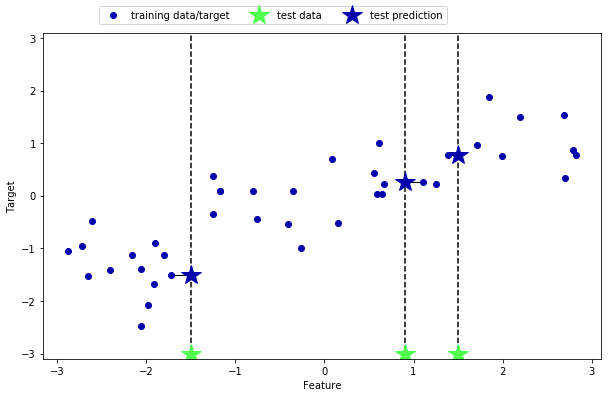

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

x축에 세 개의 테스트 데이터를 흐린 별모양

최근접 이웃을 한 개만 이용할 때 예측 = 그냥 가장 가까운 이웃의 타깃값 ( 진한 별모양)

이웃이 둘 이상 사용하여 회귀 분석 -> 평균이 예측됨

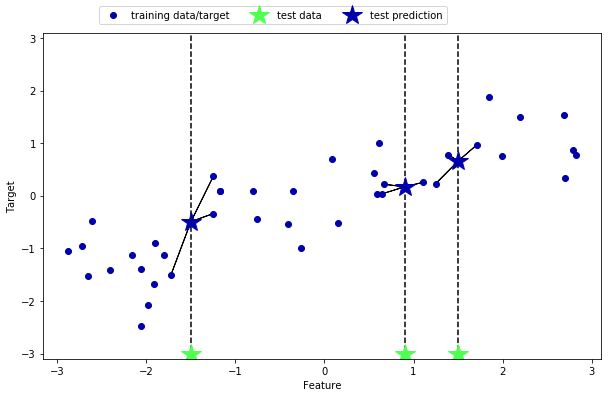

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

scikit-learn에서 회귀를 위한 k-최근접 이웃 알고리즘은 KNeighborsRegressor에 구현 : 사용법은 KNeighborsClassifier와 비슷

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X, y =mglearn.datasets.make_wave(n_samples=40)

wave 데이터 셋을 train세트와 test 세트로 나눔

In [24]:
X_train ,X_test, y_train, y_test = train_test_split(X,y,random_state=0)

이웃의 수 = 3 으로하여 모델의 객체 만듦

In [25]:
reg =KNeighborsRegressor(n_neighbors=3)

훈련데이터와 타깃을 사용하여 모델 학습

In [26]:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

테스트 세트에 대한 예측

In [27]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


score 메서드를 사용해 모델 평가 

회귀일땐 R^2 값을 반환 -> 결정 계수 R은 예측의 적합도를 0과 1사이의 값으로 계산한 것

1은 예측이 완벽한 경우

0은 훈련 데이터 세트의 출력값인 y_train의 평균으로만 모델을 예측

In [28]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


### KNeighborsRegressor 분석
1차원 데이터셋에 대한모든 특성값을 만들어 예측 할 수 있음

이를 위해 x축 따라 많은 포인트를 생성해 테스트 데이터셋을 만든다

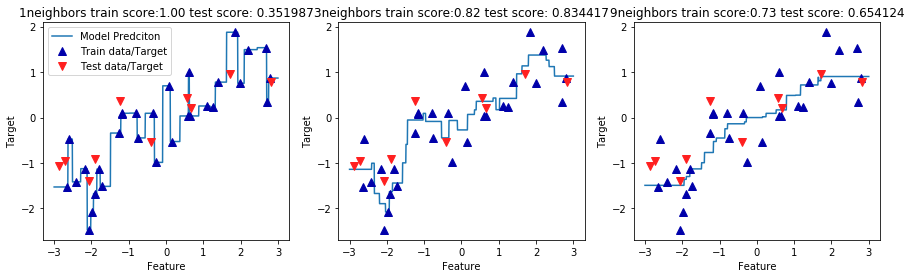

In [29]:
fig, axes =plt.subplots(1,3,figsize=(15,4))

# -3과 3 사이에 1000개의 데이터 포인트를 만듬
line =np.linspace(-3,3,1000).reshape(-1,1)

#1,3,9 이웃을 사용한 예측
for n_neighbors, ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{}neighbors train score:{:.2f} test score: {:2f}".format(n_neighbors, reg.score(X_train, y_train),reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model Predciton","Train data/Target","Test data/Target"],loc="best")    

이웃 하나만 사용 ->> 훈련 세트의 각 데이터 포인트가 예측에 주는 영향 큼 ->훈련 데이터 포인트를 모두 지나감 -> 불안정한 예측

이웃을 많이 사용 ->훈련 데이터에 잘 안맞음 but 안정된 예측

### 매개변수

KNeighbors 분류기 중요한 매개변수 2개 : 데이터 포인트 사이의 거리를 재는 방법, 이웃의 수

기본적으로 여러 환경에서 잘 동작하는 유클리디안 거리 방식 사용

이웃의 수는 3개나 5개 정ㄷ로 적을때 잘 작동---- 잘 조정해야함

### 장점
1. 이해하기 매우 쉬움
2. 많이 조정하지 않아도 좋은 성능을 발휘 -> 더 복잡한 알고리즘을 적용하기전에 시도해 볼 수 있는 좋은 시작점
3. 매우 빠르게 만들 수 있음

### 단점
1. 훈련 세트가 매우크면 (특성의 수 or 샘플의 수가 클 경우) 예측이 느려짐
2. 데이터 전처리과정이 중요 -> 3장 참고
3. 많은 특성을 가진 ( 수백 개 이상의) 데이터셋에서는 잘 동작X
4. 특성값 대부분이 0인 (희소한) 데이터셋과는 특히 잘 작동X

현업에서 잘 쓰지 않음

## 2.3.3 선형 모델(Linear model)
100여 년 전 개발 but 현재도 널리 쓰임

입력 특성에 대한 선형 함수를 만들어 예측

### 회귀의 선형 모델

일반화된 예측함수 : y=w[0]Xx[0]+...+w[p]Xx[p]+b

x[0]부터 x[p]는 데이터 포인트에 대한 특성 ( 특성의 갯수는 p+1)

w와 b는 모델이 학습할 파라미터

y는 모델이 만들어 낼 예측값



if 특성이 하나 -> y=w[0]Xx[0]+b  -> W[0]: 기울기  b: 절편

특성이 여러개 -> w는 각 특성에 해당하는 기울기 -> 예측값은 입력 특성에 w의 가중치를 곱해서 더한 가중치의 합 (w는 음수 일 수도 있음)

1차원 wave 데이터 셋으로부터 파라미터w[0]와 b를 직선처럼 되도록 학습

w[0]: 0.393906  b: -0.031804


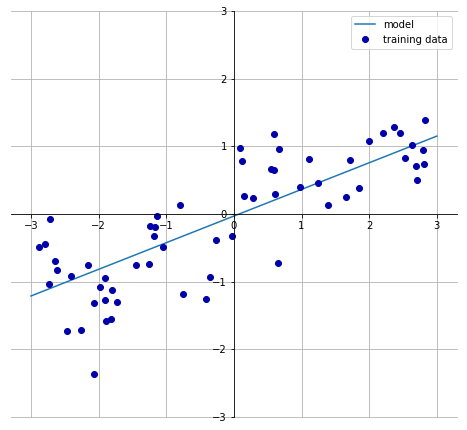

In [30]:
mglearn.plots.plot_linear_regression_wave()

선형 모델: 특성이 한개 -> 직선, 두개-> 평면 .... 더 높은 차원(특성이 더많음) -> 초 평면

위 직선과 KNeighborsRegressor를 사용하여 만든 선을 비교 -> 선형 모델이 직선을 사용한 예측에 더 제약이 많음 -> 데이터의 상세 정보를 모두 잃어버린것 처럼 보임 -> 타깃 y가 특성들의 선형 조합이라는 것은 매우 과한, 비현실적인 가정 ->1차원 데이터만 놓고봐서 생긴 편견일 수도 있음 -> 특성이 여러개인 경우 선형 모델은 매우 훌륭한 성능 낼 수 있음 -> 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃 y도 훈련세트에 대해서 완변학게 선형함수로 모델링 가능

회귀를 위한 선형 모델 다양 -> 모델 파라미터 w,b를 학습하는 방법과 모델의 복잡도를 제어하는 방법에서 차이남

### 선형 회귀(최소제곱법)
선형회귀 (linear regression) 또는 최소제곱법(OLS, odrinary least squares)은 가장 간단하고 오래된 회구용 선형 알고리즘

선형 회귀는 예측과 훈련 세트에 있는 타깃y 사이의 평균제곱오차(mean squared error)를 치소하하는 파라미터 w와 b를 찾음

평균제곱오차: 예측값과 타깃값의 차이를 제곱하여 더한 후 샘플의 갯수로 나눔

장점 : 매개 변수가 없음 -> but 모델의 복잡도를 제어할 방법이 없음

In [31]:
from sklearn.linear_model import LinearRegression

X, y =mglearn.datasets.make_wave(n_samples=40)
X_train ,X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr =LinearRegression().fit(X_train, y_train)

w : 가중치(weight) 또는 계수(coefficient)라고 하며 lr 객체의 coef_ 속성에 저장됨 -> numpy 배열

b : 편항(offset)또는 절편(intercept)라고 하며 intercept_ 속성에 저장됨 -> 실수값, 딱 하나

In [32]:
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coef_:[ 0.47954524]
lr.intercept_:-0.09847983994403892


훈련 세트와 테스트 세트의 성능 확인

In [33]:
print("훈련 세트 점수:{:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수:0.65
테스트 세트 점수:0.77


1차원 모델: 모델이 매우 단순 (제한적) -> 과대적합 걱정X

훈련세트와 테스트 점수세트 점수 비슷 -> 과소적합 상태



보스턴 주택가격 데이터셋에서 어떻게 작동하는지 살펴보자

샘플 505개, 특성 104개 (유도된 특성 포함)

In [34]:
X, y = mglearn.datasets.load_extended_boston()
X_train ,X_test, y_train, y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

print("훈련 세트 점수:{:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수:0.95
테스트 세트 점수:0.61


훈련 세트 매우 정확  but 테스트 세트 점수 낮음 -> 과대적합 -> 복잡도를 제어할 수 있는 모델 사용해야함

### 릿지(Ridge) 회귀

가중치(w) 선택 -> 훈련 데이터를 잘 예측 & 추가 제약조건을 만족시키기 위한 목적 -> 가중치의 절댓값을 가능한 작게 만듦

w의 모든원소가 0에 가깝게 -> 모든 특성이 출력에 주는 영향을 최소한(기울기를 작게 만듦) -> 이런 제약을 규제(Regularzation) -> 과대적합 방지

릿지 회귀 -> L2규제

보스턴 주택가격 데이터셋에 적용

In [35]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수:{:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수:0.89
테스트 세트 점수:0.75


테스트세트에서 점수 더 높음 -> 덜 자유로움-> 과대적합 적어짐 -> LinearRegression보다 Ridge 모델을선택

alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지 지정할 수 있음 (기본값 alpha=1.0)

최적의 alpha 값은 데이터에 따라 달라짐

alpha값 높임 -> 계수는 0에 더 가까워짐 ->  훈련 세트 성능 감소 but 일반화에 도움됨

아주 작은 alphh값 -> 계수를 거의 제한하지 않음 -> LinearRegression 모델과 비슷

In [36]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("훈련 세트 점수:{:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수:0.79
테스트 세트 점수:0.64


In [37]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("훈련 세트 점수:{:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수:0.93
테스트 세트 점수:0.77


이 데이터에서는 alpha=0.1이 좋음 (좋은 매개변수를 선택하는법 -> 5장)

alpha값에 따라 모델의 coef_ 속성이 어떻게 달라지는지 조사 -> alpha 매개변수가 모델을 어떻게 변경시키는지 이해 도움

높은 alpha -> 더많은 제약 -> 작은 alpha값일 때보다 coef_ 절댓값 크기가 작음

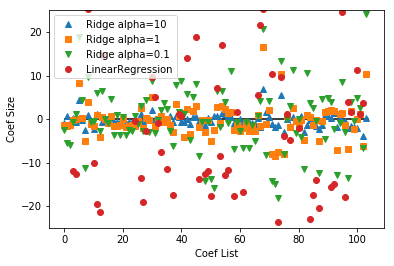

In [38]:
plt.plot(ridge10.coef_,'^',label="Ridge alpha=10")
plt.plot(ridge.coef_,'s',label="Ridge alpha=1")
plt.plot(ridge01.coef_,'v',label="Ridge alpha=0.1")

plt.plot(lr.coef_,'o',label="LinearRegression")
plt.xlabel("Coef List")
plt.ylabel("Coef Size")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

alpha가 작을수록 모델의 계수의 절댓값이 커짐 -> alpha=0일때는 그림밖으로도 나감

---
alpha값 고정 and 훈련 데이터 크기를 변화시킴

보스턴 주택가격 데이터셋에서 여러 가지 크기로 샘플링 후 LinearRegression과 Ridge(alpha=1)을 적용함

데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프 -> 학습곡선(learning curve)

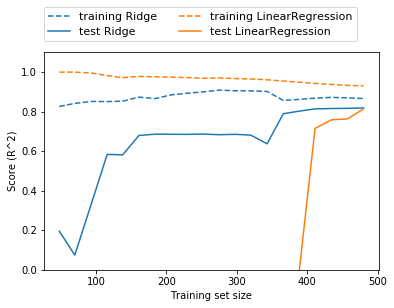

In [39]:
mglearn.plots.plot_ridge_n_samples()

모든 데이터셋에서 릿지와 선형 회구 모두 점수가 훈련> 테스트

릿지에서는 규제 적용 -> 훈련데이터 점수가 선형회귀보다 작음 but 테스트 점수 더 높음

게다가 데이터 셋 크기가 400 미만 -> 선형 회귀는 어떤것도 학습 못함

두 모델 모두 데이터가 많을 수록 성능 좋음 -> 마지막에는 선형회귀가 릿지회귀를 따라잡음

-> 데이터 충분하면 규제항은 덜 중요 -> 릿지랑 선형회귀 성능 같아짐

데이터 많아짐 -> 기억하기 어렵고, 과대적합하기 어려워짐 -> 선형 회귀 훈련 데이터 성능 낮아짐

### 라쏘(lasso)
선형 회귀에 규제를 적용하는데 Ridge의 대안

Ridge회귀처럼 라쏘도 계수를 0에 가깝게 만들려고 함 but 방식에 차이점이 있음 (라쏘:L1규제, Ridge:L2규제)

실제로 L1규제를 사용하다보면 어떤 계수는 0이 되기도 함 -> 모델에서 완전히 제외되는 특성 생김 -> 특성선택(feature selection)이 자동으로 이뤄짐

확장된 보스턴 주택가격 데이터셋에 lasso 적용

In [40]:
from sklearn.linear_model import Lasso

lasso =Lasso().fit(X_train, y_train)
print("훈련 세트 점수:{:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수:{}".format(np.sum(lasso.coef_ !=0)))

훈련 세트 점수:0.29
테스트 세트 점수:0.21
사용한 특성의 수:4


특성 104개중 4개 사용 ->과소적합-> 훈련, 테스트 모두 점수 안좋음 

Ridge처럼 Lasso도 얼마나 강하게 0으로 보낼지 매개변수 alpha으로 조절

과소적합 줄이기 -> alpha값 줄임 -> 반복 실행하는 최대횟수(max_iter)의 기본값 늘려야함 (늘리지 않으면 늘리라고 경고뜸)

너무 낮추면 규제효과X -> 과대적합 -> 선형회귀와 비슷

In [41]:
lasso001=Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 수:{}".format(np.sum(lasso001.coef_ !=0)))

훈련 세트 점수:0.90
테스트 세트 점수:0.77
사용한 특성의 수:33


In [42]:
lasso00001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수:{}".format(np.sum(lasso00001.coef_ !=0)))

훈련 세트 점수:0.95
테스트 세트 점수:0.64
사용한 특성의 수:94


alpha값이 다른 모델들의 계수를 그래프로 그려보자

Text(0,0.5,'Coef Size')

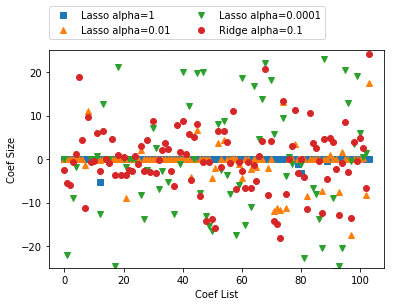

In [43]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v',label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o',label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Coef List")
plt.ylabel("Coef Size")

alpha=1 => 계수 대부분이 0 + 나머지 계수들도 크기가 작음

alpha=0.01 => 대부분 특성이 0

alpha=0.0001 => 규제 잘 안받음

보통은 릿지 회귀를 선호 but 특성이 많거나 일부만 중요하면 Lasso 선호될수 있음 -> 쉽게 모델 만들 수 있음


scikit-learn은 Lasso와 Ridge의 페널티를 결합한 ElasticNet 제공 -> 최상위 성능 but L1과 L2규제를 위한 매개변수 두개를 조정해야함

### 분류용 선형 모델

분류에도 사용가능 이진 분류에서 예측을 위한 방정식은 아래와 같음

y= w[0] X x[0] + w[1] X x[1] + ... + w[p] X x[p]+b > 0    => 0보다 크면 클래스를 +1, 0보다 작으면 클래스를 -1

---------------------------------------------------------------------------------------------------------------------

회귀용 선형모델: 출력 y가 특성 의 선형함수 -> 직선, 평면, 초평면(차원이 3이상)

뷴류용 선형모델: 결정 경계가 입력의 선형 함수 -> (이진) 선형 분류기는 선, 평면, 초평면을 사용해서두 개의 클래스를 구분하는 분류기

----------------------------------------------------------------------------

선형 모델을 학습시키는 알고리즘은 다양 -> 크게 아래 두방법으로 나눔

1. 특정 계수와 정편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
2. 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지

알고리즘들은 훈련 세트를 잟 학습하는지 측정하는 법이 각각 다름 + 게다가 분류의 수를 최소화하도록 w와 b를 조정하는 것은 불가능

가장 널리 알려진것 linear_model.LogistricRegression에 구현된 로지스틱회귀(logistic regression)와 svm.LinearSVC에 구현된 선형 서포트 벡터 머신(support vector machine). 

SVC는 spport vector classifier의 약자

----------------------------------------------------------------------------------
forge 데이터 셋을 사용하여 LogistricRegression과 LinearSVC 모델을 만들고 이 선형 모델들이 만들어낸 결정 경계를 그림으로 나타내자


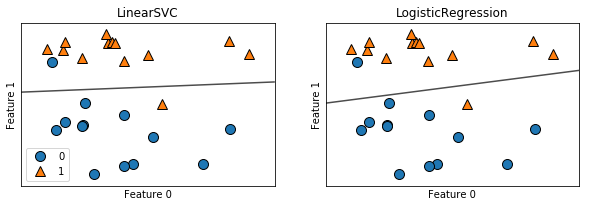

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y =mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf =model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1], y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()    


첫번째 특성 x축, 두번째 특성 y축

직선 위쪽은 클래스 1, 아래쪽은 클래스 0

-----------------
LogistricRegression과 LinearSVC규제의 강도를 결정하는 매개변수 = C 

=> C가 높으면 규제 감소 // 높은 C값 => LogistricRegression과 LinearSVC 두 모델은 훈련 세트에 최대한 맞추려고 함

=> C가 낮으면 w가 0에 가까워지도록 만듬

LinearSVC로 확인해보자

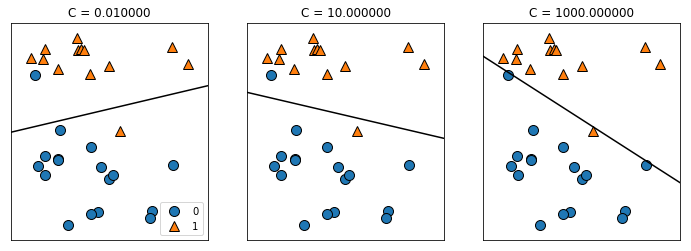

In [45]:
mglearn.plots.plot_linear_svc_regularization()

왼쪽그림: C값이 매우 작음 => 규제가 많이 적용 => 클래스 0 대부분은 아래로 1은 위 => 비교적 수평, 잘못 분류 2개

중간그림 : C값이 조금더 큼 =>잘못 분류한 두 샘플에 민감 => 경계가 기울어짐

오른쪽그림: C값이 매우큼 => 결정 경계 기울고, 클래스0은 잘 분류 =>과대적합된듯

분류에서 선형 모델은 낮은 차원의 데이터에서는 결정 경계가 직선or평면 => 매우 제한적인 것 처럼 보임

고차원에서 매우 강력 but 과대적합되지 않도록 주의

In [53]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg=LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수:{:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg.score(X_test, y_test)))


훈련 세트 점수:0.955
테스트 세트 점수:0.958


C=1 (기본값) => 훈련과 테스트 세트 모두 95% 정확도 but 성능이 매우 비슷 => 과소적합 => 모델의 제약을 더 풀어주기 위해 C를 증가시켜야함

In [56]:
logreg100=LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수:{:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수:0.972
테스트 세트 점수:0.965


C=100 => 훈련/테스트 둘다 정확도 오름 =>복잡도가 높은 모델일수록 성능이 좋음

규제를 더 강하게 하기 위해 C=0.01 사용

In [57]:
logreg001=LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수:{:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수:0.934
테스트 세트 점수:0.930


매개변수 C 설정을 세 가지 다르게 하여 학습시킨 모델의 계수를 확인하자

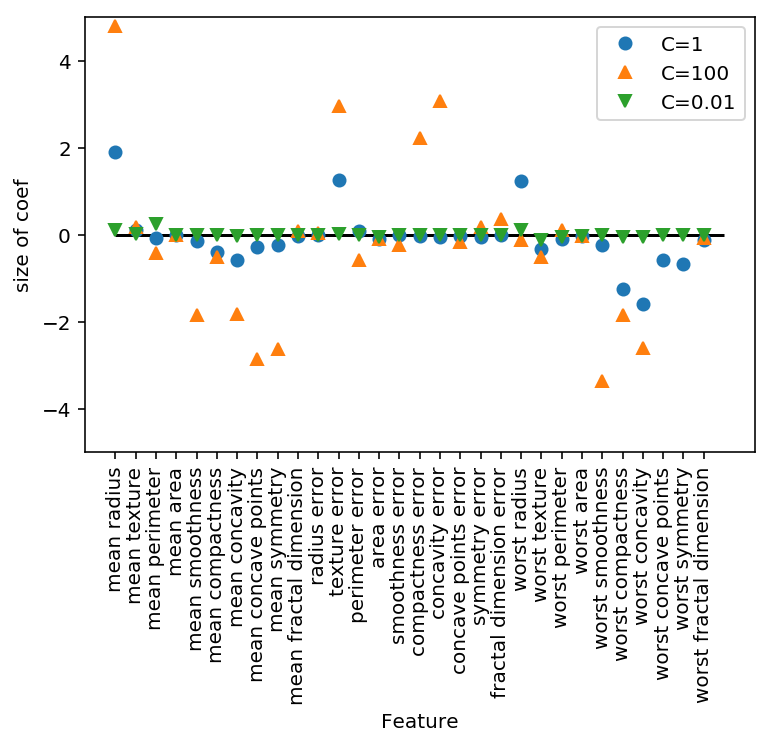

In [66]:
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg001.coef_.T,'v',label="C=0.01")

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("size of coef")
plt.legend()

#### NOTE

LogisticRegression은 기본적으로 L2규제 => Ridge와 비슷 => 규제 강하게 할 수록 계수들은 0에 가까워짐 but 완전히 0은 안됨.

세번째 계수 mean perimeter를 보면 c=100, c=1때 음수, C=0.001때 양수이고 c=1때보다 절댓값이 큼

이와같이 모델을 해석하면 계수와 클래스와 특성의 연관성을 알려줌 

예: "texture error"특성은 악성인 샘플과 관련이 깊음 but "mean perimeter"는 계수 부호가 바뀌는 것으로 보아 높아도 양성이나 악성의 신호 모두 될수 있음

이처럼 선형 모델의 계수는 항상 의심해봐야하고, 조심해서 해석해야한다.



더 쉬운 이해를 원한다면 L1 규제 사용

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


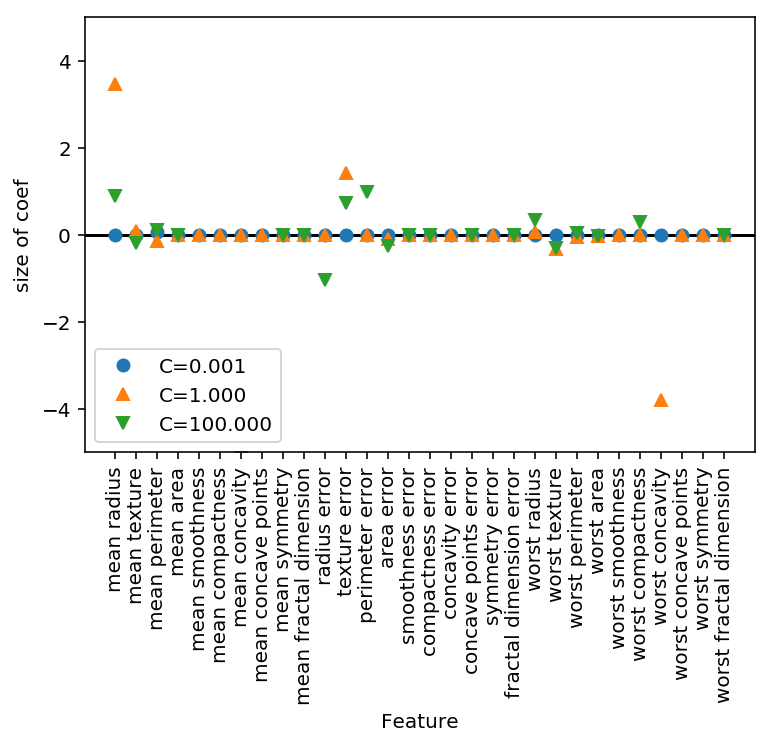

In [68]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("size of coef")

plt.ylim(-5, 5)
plt.legend(loc=3)

이진 분류에서의 선형 모델과 회귀에서의 선형 모델 사이에는 유사점이 많음 

회귀처럼, 모델들의 주요 차이는 규제에서 모든 특성을 이용할지 일부 특성만을 사용할지 결정하는 panalty  매개변수임